In [1]:
import json
from tqdm import tqdm,tqdm_notebook
import pandas as pd

In [2]:
stories = pd.read_csv('C:/Users/Игорь/Downloads/data_like/stories_description.csv')

In [3]:
stories.head()

,story_id,story_json
0,127,"{""guid"":""770a5bae-0e3f-4a6b-b924-bd87bd51a038""..."
1,254,"{""guid"":""64f4c9ef-647b-4e04-b4d4-02297e939388""..."
2,865,"{""guid"":""3482206b-d223-4aec-92ba-0150055cd68a""..."
3,1491,"{""guid"":""5f4a9215-01de-4777-b70f-a18899db8f1c""..."
4,598,"{""guid"":""ed8754bd-67be-4fa1-9289-5508d96f1fa4""..."


In [4]:
def get_all(myjson, key, keys=None):
    if keys is None:
        keys = []
    if type(myjson) is dict:
        for jsonkey in (myjson):
            if type(myjson[jsonkey]) in (list, dict):
                get_all(myjson[jsonkey], key, keys)
            elif jsonkey == key:
                keys.append(myjson[jsonkey])
    elif type(myjson) is list:
        for item in myjson:
            if type(item) in (list, dict):
                get_all(item, key, keys)
    return " ".join([" ".join(k.split()) for k in keys])

In [5]:
texts = []
for story_id, story in tqdm_notebook(stories.values):
    story_dict = json.loads(story.replace('\\\\','\\'))
    texts.append([story_id, get_all(story_dict, "text")])

In [6]:
texts[:5]

[[127,
  'Как изменить ПИН-код Зайдите с главной в меню «Еще» и выберите во вкладке настроек «ПИН-коды карт». Нажмите «Изменить ПИН-код». Введите дату своего рождения, чтобы разрешить операцию. Введите новую комбинацию и нажмите кнопку «Задать ПИН-код».'],
 [254,
  'Как пополнить карту «Стрелка» В приложении Тинькофф Откройте вкладку «Оплатить» и выберите в платежах «Транспорт». Выберите в меню карту «Стрелка». Введите номер карты и сумму, которую хотите внести на счет. Нажмите кнопку «Оплатить». Пополнить карту'],
 [865,
  'Тинькофф Инвестиции 2.0 У нас хорошие новости для тех, кто никак не мог решиться инвестировать Что случилось Тинькофф Банк получил лицензию брокера — и теперь открывает счета на бирже сам. Это значит, что с 15 мая Тинькофф Инвестиции стали еще удобнее. Комиссия снижена в 10 раз До 30 июня мы снизили комиссию за сделку до 0,03% и отменили минимальную плату 99 рублей. Составьте инвестиционный портфель и экономьте на комиссии. Покупка во время работы бирж Теперь с пом

In [7]:
len(texts)

959

In [8]:
texts[0][1]

'Как изменить ПИН-код Зайдите с главной в меню «Еще» и выберите во вкладке настроек «ПИН-коды карт». Нажмите «Изменить ПИН-код». Введите дату своего рождения, чтобы разрешить операцию. Введите новую комбинацию и нажмите кнопку «Задать ПИН-код».'

In [9]:
for i in range(len(texts)):
    if ('налог' in texts[i][1]) & ('ть' in texts[i][1]):
        print('=====================================================================')
        print(texts[i][1])

Тинькофф Инвестиции 2.0 У нас хорошие новости для тех, кто никак не мог решиться инвестировать Что случилось Тинькофф Банк получил лицензию брокера — и теперь открывает счета на бирже сам. Это значит, что с 15 мая Тинькофф Инвестиции стали еще удобнее. Комиссия снижена в 10 раз До 30 июня мы снизили комиссию за сделку до 0,03% и отменили минимальную плату 99 рублей. Составьте инвестиционный портфель и экономьте на комиссии. Покупка во время работы бирж Теперь с помощью карты можно покупать бумаги в любое время, пока открыта биржа. Не нужно заранее держать деньги на брокерском счете. Более 100 новых бумаг В приложении появились новые акции, облигации и несколько десятков ОФЗ с Московской и Санкт-Петербургской биржи. Возможностей для инвестиций стало больше. Круглосуточный вывод на карту Больше не нужно ждать два дня для вывода. Теперь деньги с брокерского счета доходят мгновенно. Даже в ночь с субботы на воскресенье. Налоги онлайн Налоги не станут неожиданностью. Покажем, сколько налога

Автоплатежи штрафов ГИБДД и ФССП Чтобы подключить автоплатеж штрафов ГИБДД и начислений ФССП, откройте вкладку «Еще» → «Подписки». Перейдите в «Мои подписки». Нажмите «Добавить подписку», если у вас еще не подключен автоплатеж штрафов. В категории Госуслуг находятся подписки на штрафы. Выберите, на какие налоги и штрафы хотите подписаться. Передвиньте бегунок «Автоплатеж» вправо, если хотите автоматически оплачивать штрафы. Укажите максимальную сумму оплаты и нажмите «Готово» в правом верхнем углу экрана. Проверить штрафы
Жизнь в Сингапуре Это Славина. Вместе с мужем они решили сменить страну и климат и в 2014 году переехали в Сингапур. Сингапур находится почти на экваторе. Круглый год тут +30 °C. С марта по август — сухой сезон. С сентября по февраль — сезон дождей. Пик ливней приходится на ноябрь и декабрь. Минимальная зарплата по рабочей визе 281 500 ₽ до вычета налогов. Налоги платят раз в год. Итоговую сумму считают по всему годовому доходу, включая бонусы. Квартиру с одной спальн

Жизнь в Алма-Ате Это Елена. Она переехала в Алма-Ату вместе со своим парнем в 2014 году, когда ему предложили работу в казахстанском банке. Без регистрации с российским паспортом в Казахстане можно находиться 30 дней. Если устроиться на работу, регистрацию оформляют на срок трудового договора. Средняя зарплата у иностранцев в Алма-Ате с учетом налогов — 53 570 ₽ в месяц, у местных — 22 071 ₽. Однокомнатная квартира в хорошем районе Алма-Аты ближе к горам стоит 18 000 ₽ в месяц. В городе есть одна ветка метро из 9 станций, троллейбусы и много автобусных маршрутов. 27 ₽ стоит поездка в автобусе. На рынках продаются свежие овощи, фрукты, орехи, молоко и мясо. Килограмм помидоров стоит 180 ₽, груш — 145 ₽, говядины — 357 ₽. Из Алма-Аты удобно ездить в Узбекистан и Киргизию, путешествовать по городам Великого шелкового пути, или поехать к озеру Иссык-Куль. Можно даже добраться на машине до Китая. Жизнь в Алма-Ате
Жизнь на Шпицбергене Это Назиля Три года назад она переехала на Шпицберген. Жи

Как платить налоги с заработка на криптовалюте Минфин опубликовал письмо о налогах с заработка на криптовалютах. Теперь в декларации нужно указывать доходы с крипты и платить налог Неужто приняли закон о криптовалюте? Правительство хочет признать крипту цифровым финансовым активом, но закон пока на рассмотрении. Сейчас Минфин считает криптовалюту имуществом. Как тогда считать налог? Минфин предлагает указывать доходы и расходы как при продаже имущества и платить налог с прибыли от сделки. Для резидентов налог — 13%. Биткоин вырос — это доход? Пока крипта лежит у вас на кошельке — это не доход. Доход вы получите, когда продадите биткоин и вам на карту придут реальные деньги. А если продал в убыток? Убытки бюджет не возмещает и не переносит их на будущие годы. Засчитать убыток прошлого года в счет прибыли текущего нельзя. А как же вычет при продаже имущества? Доход от продажи криптовалюты можно уменьшить на расходы на его покупку. Собирайте все документы о переводах, платежах и транзакци

Как работает полис ОМС И как по нему бесплатно лечиться Что такое ОМС? ОМС — это программа обязательного страхования. Мы платим государству налоги, а оно взамен гарантирует нам бесплатную медицинскую помощь. Где лечат по полису ОМС? В любой государственной клинике — главное, чтобы с ней работала ваша страховая компания. Чтобы постоянно наблюдаться в клинике, нужно к ней прикрепиться. Что входит в лечение по ОМС? Все, что угрожает вашей жизни и здоровью. Минимальный список бесплатных услуг есть в базовой программе ОМС. Регионы могут его расширять по своему усмотрению, а вот сокращать — нет. Постановление об ОМС А если у меня нет полиса ОМС? Оформляйте. Выберите страховую компанию, которая оформляет полис, и приходите туда с паспортом и СНИЛС. Что делать, если врачи не принимают по ОМС? Если вам отказывают в помощи — звоните в страховую. По закону вы можете пользоваться полисом даже с истекшим сроком действия. Если полиса у вас с собой нет — достаточно его фотографии, где виден номер. Хо

Жизнь в Стокгольме Это Наталья. В 2014 году она переехала к своему молодому человеку в Стокгольм. Шведы лояльны в вопросе визы. Если партнер — гражданин Швеции, вид на жительство выдают без регистрации брака и сразу на два года. Наталья заплатила за такую визу 10 500 ₽. Средняя зарплата учителя в Стокгольме — 205 000 ₽, а программиста — 248 000 ₽. Чем больше зарабатываешь, тем больше платишь налогов. Однокомнатная квартира в среднем стоит 54 000 ₽ в месяц. На жилье большой спрос: чтобы официально снять квартиру, нужно 7—10 лет стоять в очереди. В Стокгольме есть три ветки метро, автобусы, трамваи, электрички, узкоколейки и даже лодки. Единый проездной на все виды транспорта стоит 5800 ₽ в месяц. В Стокгольме огромный выбор еды, в том числе модных продуктов без лактозы и глютена. Белый хлеб стоит 154 ₽, литр овсяного молока — 126 ₽. А алкоголь можно купить только в спецмагазинах. Шведы первые в мире ввели оплачиваемый декретный отпуск для обоих родителей. Летом все могут взять отпуск на

Как сэкономить в путешествии Меняйте валюту по выгодному курсу Не в аэропорту и желательно не на улице. В последнем случае предложение может показаться выгодным, но риск обмана высок. Лучше поискать официальные обменники или банки. Покупайте заранее Так можно поймать скидки на мероприятия, а также найти дешевые поезда и автобусы по стране. В некоторые музеи билеты через интернет тоже продают дешевле. Оформите проездной или туристическую карту Это поможет в европейских городах сэкономить на экскурсиях, музеях и поездках на общественном транспорте. Планируйте посещение достопримечательностей Музеи, исторические памятники и даже национальные парки обычно дешевле в будни. В определенные дни месяца их можно посещать и вовсе бесплатно — загляните на сайт достопримечательности. Сохраните информацию Чтобы не тратиться на интернет, сохраните в памяти телефона всё, что может пригодиться: маршруты, адреса, номера телефонов, словарь. Еще можно скачать аудиогиды — это поможет дополнительно сэкономи

In [10]:
stories_reaction = pd.read_csv('C:/Users/Игорь/Downloads/data_like/stories_reaction_train.csv')

In [11]:
def react_coder(x):
    if x == 'view':
        return 0
    elif x == 'skip':
        return 1
    elif x == 'like':
        return 2
    return 3
stories_reaction['event_code'] = stories_reaction['event'].apply(react_coder)

In [12]:
stories_reaction.head(20)

,customer_id,story_id,event_dttm,event,event_code
0,15,138,2018-07-24 15:33:22,view,0
1,15,202,2018-06-04 08:08:08,skip,1
2,15,222,2018-06-17 13:44:45,skip,1
3,15,379,2018-05-23 05:41:43,skip,1
4,15,544,2018-07-25 02:16:29,view,0
5,15,610,2018-07-29 01:49:35,view,0
6,15,645,2018-07-24 15:33:22,view,0
7,15,687,2018-05-23 05:41:43,view,0
8,15,770,2018-06-04 08:08:08,skip,1
9,15,781,2018-06-03 09:24:45,view,0


In [13]:
stories_reaction['event_code'].hist()

In [14]:
dislike = stories_reaction[stories_reaction['event_code'] == 3]


In [15]:
len(dislike['story_id'].unique())

507

In [16]:
bad_stories= dislike.groupby('story_id').count().sort_values('event',ascending = False)
bad_stories_list = bad_stories.index.to_list()

In [17]:
for i in range(len(texts)):
    if texts[i][0] in bad_stories.head(5).index:
        print('===========================================',texts[i][0],'=========================================')
        print(texts[i][1])

=========================================== 420 =========================================
6 правил пользования кредиткой Которые сделают ее выгодной и принесут деньги Не доводите до процентов Сделайте так, чтобы вам никогда не нужно было платить проценты. Увидели дату в выписке из банка — погасите весь долг до ее наступления. Тратьте в меру Если знаете, что своих денег не хватит, чтобы погасить долг по кредитке разом, лучше воздержаться от дорогой покупки. Зарабатывайте на остатке Весь месяц тратьте деньги с кредитки, а на Tinkoff Black храните всю зарплату и получайте проценты. Когда придет следующая зарплата, погасите ей долг по кредитке. Посчитайте траты при снятии наличных За снятие и переводы с кредитки банк берет комиссию и начисляет повышенный процент сразу. Не снимайте мелкие суммы: комиссия будет за каждое снятие. Пользуйтесь бонусными программами Копите бонусы и мили за покупки по карте, чтобы обменять их на новые покупки и авиабилеты. Так карта окупит расходы на свое годовое

In [18]:
like = stories_reaction[stories_reaction['event_code'] == 2]
good_stories = like.groupby('story_id').count().sort_values('event',ascending = False)
good_stories_list = good_stories.index.to_list()

In [19]:
good_stories.head()

,customer_id,event_dttm,event,event_code
story_id,,,,
379,1402,1402,1402,1402
1311,1084,1084,1084,1084
644,865,865,865,865
956,830,830,830,830
1057,659,659,659,659


In [20]:
for i in range(len(texts)):
    if texts[i][0] in good_stories.head(5).index:
        print('===========================================',texts[i][0],'=========================================')
        print(texts[i][1])

=========================================== 644 =========================================
Перевод на карту — это еще не доход В СМИ пугают, что все переводы на карту — это доход. Не волнуйтесь, вам не нужно платить НДФЛ со всех поступлений на карту. Если вам дарят деньги или подарок от родственника, забудьте про налоги. Когда вам возвращают долг — это тоже не доход. Еще не платят налоги с пенсии, стипендии и благотворительной помощи. Даже у репетитора есть налоговые каникулы в 2018 году. Мы выяснили, какие доходы облагаются налогом. Узнать
=========================================== 1311 =========================================
Собираетесь ли вы в ближайшее время за границу? Нет Да Давайте запланируем? В следующий раз покажем подборку городов для вашего мини-отпуска. Восхитительно! В следующий раз покажем вам подборку советов, о чем нужно позаботиться перед поездкой, чтобы защитить себя, деньги и багаж.
=========================================== 1057 =================================

In [21]:
transactions = pd.read_csv('C:/Users/Игорь/Downloads/data_like/transactions.csv')
transactions.head()

,customer_id,transaction_month,transaction_day,transaction_amt,merchant_id,merchant_mcc
0,855115,7,3,1500,4554547,5411
1,997036,6,6,0,1657528,5411
2,398237,5,24,2500,26375569,5813
3,997036,6,2,0,16304402,5411
4,291636,7,25,0,1259505,5411


In [22]:
transactions_mean = transactions.groupby('customer_id').sum().sort_values('transaction_amt',ascending = False)

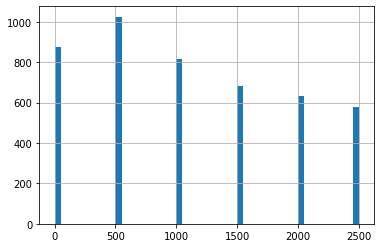

In [23]:
transactions_mean[transactions_mean['transaction_amt'] < 3000]['transaction_amt'].hist(bins=50)

In [24]:
len(transactions['customer_id'].unique())

46948

In [25]:
dislike.head()

,customer_id,story_id,event_dttm,event,event_code
93,362,426,2018-05-26 04:36:20,dislike,3
97,362,804,2018-06-15 15:30:44,dislike,3
104,362,1057,2018-06-19 02:00:45,dislike,3
517,972,314,2018-06-04 10:36:08,dislike,3
546,1087,693,2018-06-26 17:55:32,dislike,3


In [26]:
dislike_users = dislike.groupby('customer_id').count().sort_values('story_id',ascending = False)

In [27]:
dislike_users = dislike_users.reset_index()

In [28]:
dislike_users.head()

,customer_id,story_id,event_dttm,event,event_code
0,662175,136,136,136,136
1,173326,109,109,109,109
2,157250,55,55,55,55
3,202036,54,54,54,54
4,17028,53,53,53,53


In [29]:
dislike_users_list = dislike_users.index.to_list()

In [30]:
import seaborn as sns

In [31]:
data = pd.merge(dislike_users,transactions_mean, on='customer_id', how='inner')

In [32]:
data.head()

,customer_id,story_id,event_dttm,event,event_code,transaction_month,transaction_day,transaction_amt,merchant_id,merchant_mcc
0,662175,136,136,136,136,1708,4399,133000,16454661397,1394901
1,173326,109,109,109,109,464,1501,24500,6544155945,424669
2,157250,55,55,55,55,64,170,12500,1060998293,57451
3,202036,54,54,54,54,1180,2941,179000,11077188709,1011136
4,17028,53,53,53,53,853,2342,42500,8962400176,744081


In [33]:
data.drop(columns = ['story_id','event_dttm','event_code'])

,customer_id,event,transaction_month,transaction_day,transaction_amt,merchant_id,merchant_mcc
0,662175,136,1708,4399,133000,16454661397,1394901
1,173326,109,464,1501,24500,6544155945,424669
2,157250,55,64,170,12500,1060998293,57451
3,202036,54,1180,2941,179000,11077188709,1011136
4,17028,53,853,2342,42500,8962400176,744081
5,13614,52,2093,5711,429000,19478355054,1885093
6,263486,51,1467,4166,112000,13012839844,1289999
7,11240,32,574,1564,343000,5717330795,542606
8,644459,28,389,815,55500,5209239297,355987
9,269304,28,819,2545,109500,9354361319,697253


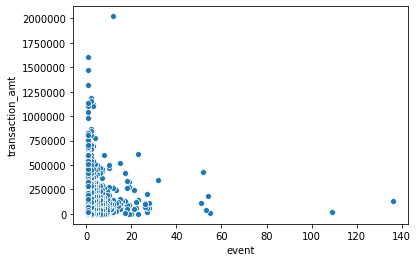

In [34]:
sns.scatterplot(x="event", y="transaction_amt", data=data)

In [35]:
def concatenator(x):
    return list(zip(x['story_id'],x['event_code']))

In [36]:
sequences = stories_reaction.groupby('customer_id')['story_id','event_code'].apply(concatenator)

In [37]:
type(sequences)

pandas.core.series.Series

In [38]:
sequences.head()

customer_id
15     [(138, 0), (202, 1), (222, 1), (379, 1), (544,...
73     [(126, 1), (470, 1), (496, 1), (586, 0), (622,...
91                                           [(1255, 0)]
129    [(144, 1), (145, 1), (234, 1), (286, 0), (354,...
144                                           [(302, 0)]
dtype: object

In [39]:
print('Median length: {}\nMean length: {}\nMax length: {}'.format(
    sequences.apply(len).median(), sequences.apply(len).mean(), sequences.apply(len).max()))

Median length: 4.0
Mean length: 11.539742933099193
Max length: 430


In [40]:
sequences2use = sequences[sequences.apply(len) >= 5]

In [41]:
sequences2use

customer_id
15         [(138, 0), (202, 1), (222, 1), (379, 1), (544,...
73         [(126, 1), (470, 1), (496, 1), (586, 0), (622,...
129        [(144, 1), (145, 1), (234, 1), (286, 0), (354,...
178        [(230, 1), (731, 1), (950, 1), (1112, 1), (113...
362        [(146, 0), (405, 0), (426, 3), (446, 0), (492,...
                                 ...                        
1050852    [(123, 0), (303, 2), (409, 0), (499, 0), (1057...
1054778    [(145, 1), (153, 0), (153, 1), (155, 0), (317,...
1057796    [(123, 0), (303, 0), (352, 0), (1276, 0), (131...
1085762    [(419, 0), (708, 0), (723, 0), (765, 0), (819,...
1103495    [(132, 0), (135, 0), (379, 0), (405, 0), (405,...
Length: 18323, dtype: object

In [43]:
maxlen = 10 # Length of sequences in X
X = []
y = []
import tqdm
def slice_sequence(seq, num_slices):
    for i in range(1, num_slices):
        X.append(seq[-(i+maxlen): -i])
        y.append(seq[-i])
        
for seq in tqdm.tqdm(sequences2use):
    if len(seq) <= 5:
        slice_sequence(seq, 2)
    elif len(seq) <= 6:
        slice_sequence(seq, 3)
    elif len(seq) <= 8:
        slice_sequence(seq, 4)
    elif len(seq) <= 12:
        slice_sequence(seq, 6)
    elif len(seq) <= 16:
        slice_sequence(seq, 8)
    elif len(seq) <= 20:
        slice_sequence(seq, 11)
    elif len(seq) <= 26:
        slice_sequence(seq, 16)
    else:
        slice_sequence(seq, 23)

100%|█████████████████████████████████████████████████████████████████████████| 18323/18323 [00:00<00:00, 46319.21it/s]


In [44]:
dislike.head()

,customer_id,story_id,event_dttm,event,event_code
93,362,426,2018-05-26 04:36:20,dislike,3
97,362,804,2018-06-15 15:30:44,dislike,3
104,362,1057,2018-06-19 02:00:45,dislike,3
517,972,314,2018-06-04 10:36:08,dislike,3
546,1087,693,2018-06-26 17:55:32,dislike,3


In [45]:
dislike_sequences = dislike.groupby('customer_id')['story_id'].apply(list)

In [46]:
dislike_sequences.head()

customer_id
362                            [426, 804, 1057]
972                                       [314]
1087                            [693, 830, 984]
1264                                 [409, 496]
2846    [657, 893, 893, 1056, 1060, 1101, 1269]
Name: story_id, dtype: object

In [47]:
print('Moda : {}\nMean length: {}\nMax length: {}'.format(
    dislike_sequences.apply(len).mode(), dislike_sequences.apply(len).mean(), dislike_sequences.apply(len).max()))

Moda : 0    1
dtype: int64
Mean length: 2.137516254876463
Max length: 136


In [48]:
dislike_sequences2use = dislike_sequences[dislike_sequences.apply(len) >= 5]

In [49]:
dislike_sequences2use

customer_id
2846                [657, 893, 893, 1056, 1060, 1101, 1269]
6114      [500, 978, 983, 1019, 1019, 1085, 1289, 1289, ...
10406     [449, 768, 943, 991, 1279, 1294, 1307, 1359, 1...
11240     [830, 838, 839, 921, 938, 975, 975, 980, 980, ...
12513     [950, 956, 956, 1004, 1017, 1017, 1075, 1079, ...
                                ...                        
958052                           [420, 420, 580, 592, 1020]
960338    [381, 381, 1109, 1109, 1137, 1152, 1152, 1252,...
964880    [379, 582, 592, 644, 809, 845, 905, 933, 953, ...
970841                       [293, 293, 570, 774, 844, 924]
973841                   [538, 904, 1146, 1157, 1310, 1314]
Name: story_id, Length: 244, dtype: object

In [50]:
len(dislike_sequences2use)

244

In [51]:
import tqdm
maxlen = 10 # Length of sequences in X
X = []
y = []

def slice_sequence(seq, num_slices):
    for i in range(1, num_slices):
        X.append(seq[-(i+maxlen): -i])
        y.append(seq[-i])
        
for seq in tqdm.tqdm(dislike_sequences2use):
    if len(seq) <= 5:
        slice_sequence(seq, 2)
    elif len(seq) <= 6:
        slice_sequence(seq, 3)
    elif len(seq) <= 8:
        slice_sequence(seq, 4)
    elif len(seq) <= 12:
        slice_sequence(seq, 6)
    elif len(seq) <= 16:
        slice_sequence(seq, 8)
    elif len(seq) <= 20:
        slice_sequence(seq, 11)
    elif len(seq) <= 26:
        slice_sequence(seq, 16)
    else:
        slice_sequence(seq, 23)

100%|█████████████████████████████████████████████████████████████████████████████| 244/244 [00:00<00:00, 48819.83it/s]


In [52]:
len(y)

1171

In [53]:
import numpy as np
lens = [len(x) for x in X]
max(lens), min(lens), np.mean(lens), np.median(lens)

(10, 4, 8.087105038428694, 10.0)

In [54]:
from keras.preprocessing.sequence import pad_sequences

# We should pad our sequences with 0 values, so they all will have the same length
X = pad_sequences(X, maxlen=maxlen)
y = np.array(y)
X.shape, y.shape

Using TensorFlow backend.


((1171, 10), (1171,))

In [75]:
y

array([1269, 1101, 1060, ...,  844, 1314, 1310])

In [55]:
from keras.layers import Input, Embedding, SpatialDropout1D, CuDNNLSTM, Dropout, Dense
from keras.models import Model

# Let's set random seed
import tensorflow as tf
tf.set_random_seed(42)
np.random.seed(42)

In [56]:
dislike.story_id.unique().size + 1

508

In [57]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15707285738392748228
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 574642585
locality {
  bus_id: 1
  links {
  }
}
incarnation: 346151165791466026
physical_device_desc: "device: 0, name: GeForce 920M, pci bus id: 0000:04:00.0, compute capability: 3.5"
]


In [68]:
max_features = dislike.story_id.unique().size + 1
embed_size = 64

def lstm128():
    inp = Input(shape=(maxlen,))
    x = Embedding(max_features, embed_size)(inp)
    x = SpatialDropout1D(0.05)(x)
    x = CuDNNLSTM(128, return_sequences=False)(x)
    x = Dropout(0.02)(x)
    outp = Dense(max_features, activation="softmax")(x)
    model = Model(inputs=inp, outputs=outp)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop',
                  metrics=['sparse_categorical_accuracy'])
    return model

In [79]:
# Let's train our film recommender system
model = lstm128()
model.fit(X, y, batch_size=60, epochs=25, verbose=True, validation_split=0.01, shuffle=True)

Train on 1159 samples, validate on 12 samples
Epoch 1/25


InvalidArgumentError: Input to reshape is a tensor with 60 values, but the requested shape has 2147483647
	 [[{{node training_11/RMSprop/gradients/loss_11/dense_12_loss/Mean_grad/Reshape}}]]

In [61]:
import torch

In [62]:
torch.cuda.is_available()

True

In [64]:
y

array([1269, 1101, 1060, ...,  844, 1314, 1310])

In [80]:
import re

In [143]:
s = 'спорт|велосипед|футбол|хоккей|теннис|матч|спартак|динамо'
sport = []
food = []
finance = []
travel = []
culture = []
politic = []

In [145]:
for i in range(len(texts)):
    if re.search(r , texts[i][1]):
        sport.append(1)
    else:
        sport.append(0)
    if re.search(r'еда|ресторан|вино|завтрак|обед|ужин|мясо|вкус', texts[i][1]):
        food.append(1)
    else:
        food.append(0)
    
       
    

SyntaxError: invalid syntax (<ipython-input-145-0fc46b16e17b>, line 2)

In [137]:
stories = stories.drop(columns='sport')

In [138]:
stories.insert(2, "sport", sport, True) 
stories.insert(2, "food", food, True)

In [139]:
stories.head()

,story_id,story_json,food,sport
0,127,"{""guid"":""770a5bae-0e3f-4a6b-b924-bd87bd51a038""...",0,0
1,254,"{""guid"":""64f4c9ef-647b-4e04-b4d4-02297e939388""...",0,1
2,865,"{""guid"":""3482206b-d223-4aec-92ba-0150055cd68a""...",0,0
3,1491,"{""guid"":""5f4a9215-01de-4777-b70f-a18899db8f1c""...",0,1
4,598,"{""guid"":""ed8754bd-67be-4fa1-9289-5508d96f1fa4""...",0,1


In [141]:
len(stories[stories['food'] == 1])

233

In [142]:
stories = stories.drop(columns='story_json')